In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("bikeshare_nyc_raw.csv", sep="\t").iloc[:, :13]
dock = df.loc[df['in_service'] == 1] # Selecting first 13 columns
dock.head()

,dock_id,dock_name,date,hour,minute,pm,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key
0,72,W 52 St & 11 Ave,16-06-01,7,25,1,10,28,39,40.767272,-73.993929,1,1
1,72,W 52 St & 11 Ave,16-06-01,7,34,1,11,27,39,40.767272,-73.993929,1,1
2,72,W 52 St & 11 Ave,16-06-01,7,51,1,12,26,39,40.767272,-73.993929,1,1
3,72,W 52 St & 11 Ave,16-06-01,8,9,1,12,26,39,40.767272,-73.993929,1,1
4,72,W 52 St & 11 Ave,16-06-01,8,26,1,17,21,39,40.767272,-73.993929,1,1


### Add a column of timestamp

In [3]:
# construct 24 hour time
df0 = dock[dock.pm == 1]
df1 = dock[dock.pm == 0]


# am change to 24 hour time
df10 = df1[df1.hour != 12]
#print("am")
#print(df10)
# keep 12am to 0 at midnight
df11 = df1[df1.hour == 12]
df11['hour'] = 0
#print("special")
#print(df11)

# pm change to 24 hour time
df00 = df0[df0.hour != 12]
df00['hour'] = df00['hour'] + 12
#print("am")
#print(df00)
# keep 12 pm as the same (at about noon)
df01 = df0[df0.hour == 12]
#print("special")
#print(df01)

dock = df10.append([df11,df00,df01])

/Users/jiepeng/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jiepeng/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
dock = dock.drop('pm', 1)
#dock = dock.drop(dock[dock.in_service = 0].index)
dock['time'] = "20" + dock['date'] + " " + dock['hour'].astype(str) + ":" \
                + dock['minute'].astype(str)
dock['time']=dock['time'].map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M'))
dock = dock.sort_index()
dock.head()

,dock_id,dock_name,date,hour,minute,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,time
0,72,W 52 St & 11 Ave,16-06-01,19,25,10,28,39,40.767272,-73.993929,1,1,2016-06-01 19:25:00
1,72,W 52 St & 11 Ave,16-06-01,19,34,11,27,39,40.767272,-73.993929,1,1,2016-06-01 19:34:00
2,72,W 52 St & 11 Ave,16-06-01,19,51,12,26,39,40.767272,-73.993929,1,1,2016-06-01 19:51:00
3,72,W 52 St & 11 Ave,16-06-01,20,9,12,26,39,40.767272,-73.993929,1,1,2016-06-01 20:09:00
4,72,W 52 St & 11 Ave,16-06-01,20,26,17,21,39,40.767272,-73.993929,1,1,2016-06-01 20:26:00


In [ ]:
# computationally expensive
#idx = dock[dock['pm'] == 1].index.tolist()
#for a in idx:
    #print(a)
    #dock['hour'].iloc[a] = dock['hour'].iloc[a] + 12
    #print(dock['hour'].iloc[a])

In [ ]:
#dock.groupby('dock_id').hist(column='avail_docks')

In [5]:
dock['dock_available_rate'] = dock['avail_docks'] / (dock['avail_bikes'] + dock['avail_docks'])
dock['bike_available_rate'] = dock['avail_bikes'] / (dock['avail_bikes'] + dock['avail_docks'])
dock['year'] = dock.time.dt.year
dock['quarter']= dock.time.dt.quarter
dock['month'] = dock.time.dt.month
dock['day']= dock.time.dt.day
dock['hour']= dock.time.dt.hour
dock['week']= dock.time.dt.week
dock['dayofweek']= dock.time.dt.dayofweek
dock['weekday_name']= dock.time.dt.weekday_name
dock.head()
#dock.to_csv("testdata.csv", index=None)

,dock_id,dock_name,date,hour,minute,avail_bikes,avail_docks,tot_docks,_lat,_long,...,time,dock_available_rate,bike_available_rate,year,quarter,month,day,week,dayofweek,weekday_name
0,72,W 52 St & 11 Ave,16-06-01,19,25,10,28,39,40.767272,-73.993929,...,2016-06-01 19:25:00,0.736842,0.263158,2016,2,6,1,22,2,Wednesday
1,72,W 52 St & 11 Ave,16-06-01,19,34,11,27,39,40.767272,-73.993929,...,2016-06-01 19:34:00,0.710526,0.289474,2016,2,6,1,22,2,Wednesday
2,72,W 52 St & 11 Ave,16-06-01,19,51,12,26,39,40.767272,-73.993929,...,2016-06-01 19:51:00,0.684211,0.315789,2016,2,6,1,22,2,Wednesday
3,72,W 52 St & 11 Ave,16-06-01,20,9,12,26,39,40.767272,-73.993929,...,2016-06-01 20:09:00,0.684211,0.315789,2016,2,6,1,22,2,Wednesday
4,72,W 52 St & 11 Ave,16-06-01,20,26,17,21,39,40.767272,-73.993929,...,2016-06-01 20:26:00,0.552632,0.447368,2016,2,6,1,22,2,Wednesday


def cust_mean(grp):
    grp['mean_dock_available_rate'] = grp['dock_available_rate'].mean()
    grp['std_dock_available_rate'] = grp['dock_available_rate'].std()
    grp['mean_bike_available_rate'] = grp['bike_available_rate'].mean()
    grp['std_bike_available_rate'] = grp['bike_available_rate'].std()
    return grp

=
dock_avai = dock.groupby(['dock_id', 'dock_name', '_lat', '_long']).apply(cust_mean)
dock_avai = dock_avai.groupby(['dock_id', 'dock_name', '_lat', '_long'])['']

In [6]:
dock_avaia = dock.groupby(['dock_id', 'dock_name', '_lat', '_long'])['dock_available_rate'].mean().reset_index()
dock_avaia

,dock_id,dock_name,_lat,_long,dock_available_rate
0,72,W 52 St & 11 Ave,40.767272,-73.993929,0.748944
1,79,Franklin St & W Broadway,40.719116,-74.006667,0.738675
2,82,St James Pl & Pearl St,40.711174,-74.000165,0.698644
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,0.390173
4,116,W 17 St & 8 Ave,40.741776,-74.001497,0.682476
5,119,Park Ave & St Edwards St,40.696089,-73.978034,0.436588
6,120,Lexington Ave & Classon Ave,40.686768,-73.959282,0.490927
7,127,Barrow St & Hudson St,40.731724,-74.006744,0.377135
8,128,MacDougal St & Prince St,40.727103,-74.002971,0.547844
9,137,E 56 St & Madison Ave,40.761628,-73.972924,0.736674


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110940b70>]], dtype=object)

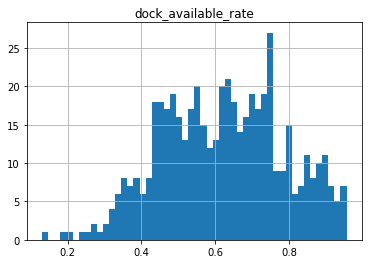

In [10]:
dock_avaia.hist(column='dock_available_rate', bins = 50)

ratio_data = dock.filter(items = ['dock_id', 'dock_name', '_lat', '_long', 'mean_empty_dock', 'std_empty_dock', 'mean_empty_bike', 'std_empty_bike'])
#ratio_data = ratio_data.drop(['date', 'hour', 'minute','avail_bikes', 'avail_docks', 'tot_docks', 'in_service','status_key', 'time', 'empty_dock', 'empty_bike'], axis=1, inplace=True)
ratio_data = ratio_data.drop_duplicates()
ratio_data.to_csv("ratio_data.csv", index=None)

In [11]:
dock_avai_week = dock.groupby(['dock_id', 'dock_name', '_lat', '_long', 'weekday_name'])['dock_available_rate'].mean().reset_index()
dock_avai_week

,dock_id,dock_name,_lat,_long,weekday_name,dock_available_rate
0,72,W 52 St & 11 Ave,40.767272,-73.993929,Friday,0.741186
1,72,W 52 St & 11 Ave,40.767272,-73.993929,Monday,0.771752
2,72,W 52 St & 11 Ave,40.767272,-73.993929,Saturday,0.744587
3,72,W 52 St & 11 Ave,40.767272,-73.993929,Sunday,0.673103
4,72,W 52 St & 11 Ave,40.767272,-73.993929,Thursday,0.719924
5,72,W 52 St & 11 Ave,40.767272,-73.993929,Tuesday,0.793507
6,72,W 52 St & 11 Ave,40.767272,-73.993929,Wednesday,0.791916
7,79,Franklin St & W Broadway,40.719116,-74.006667,Friday,0.698009
8,79,Franklin St & W Broadway,40.719116,-74.006667,Monday,0.615315
9,79,Franklin St & W Broadway,40.719116,-74.006667,Saturday,0.906994


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136797048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13c3a9518>]], dtype=object)

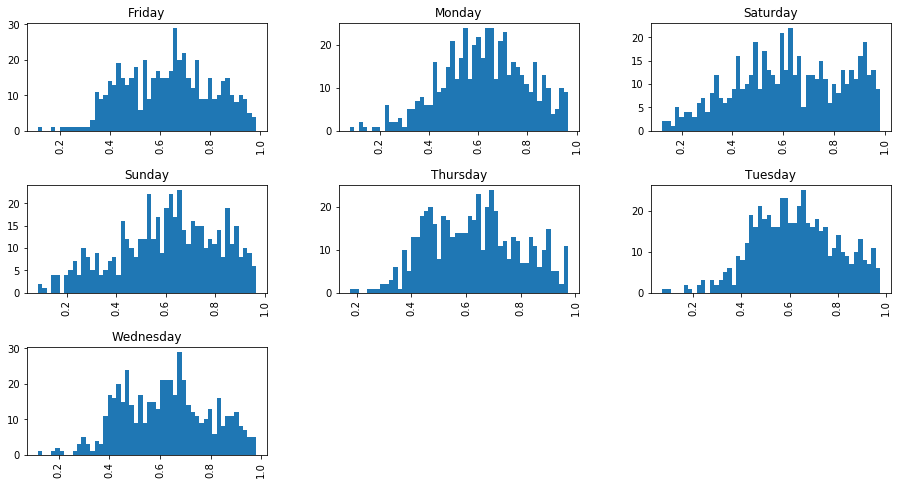

In [16]:

dock_avai_week['dock_available_rate'].hist(by=dock_avai_week['weekday_name'], bins = 50, figsize=(15, 8))

In [21]:
dock_avai_hour = dock.groupby(['dock_id', 'dock_name', '_lat', '_long','hour'])['dock_available_rate'].mean().reset_index()
dock_avai_hour

,dock_id,dock_name,_lat,_long,hour,dock_available_rate
0,72,W 52 St & 11 Ave,40.767272,-73.993929,0,0.629146
1,72,W 52 St & 11 Ave,40.767272,-73.993929,1,0.611637
2,72,W 52 St & 11 Ave,40.767272,-73.993929,2,0.613065
3,72,W 52 St & 11 Ave,40.767272,-73.993929,3,0.613709
4,72,W 52 St & 11 Ave,40.767272,-73.993929,4,0.624838
5,72,W 52 St & 11 Ave,40.767272,-73.993929,5,0.623817
6,72,W 52 St & 11 Ave,40.767272,-73.993929,6,0.623745
7,72,W 52 St & 11 Ave,40.767272,-73.993929,7,0.639478
8,72,W 52 St & 11 Ave,40.767272,-73.993929,8,0.797460
9,72,W 52 St & 11 Ave,40.767272,-73.993929,9,0.880783


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1516c2a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15fd23470>]], dtype=object)

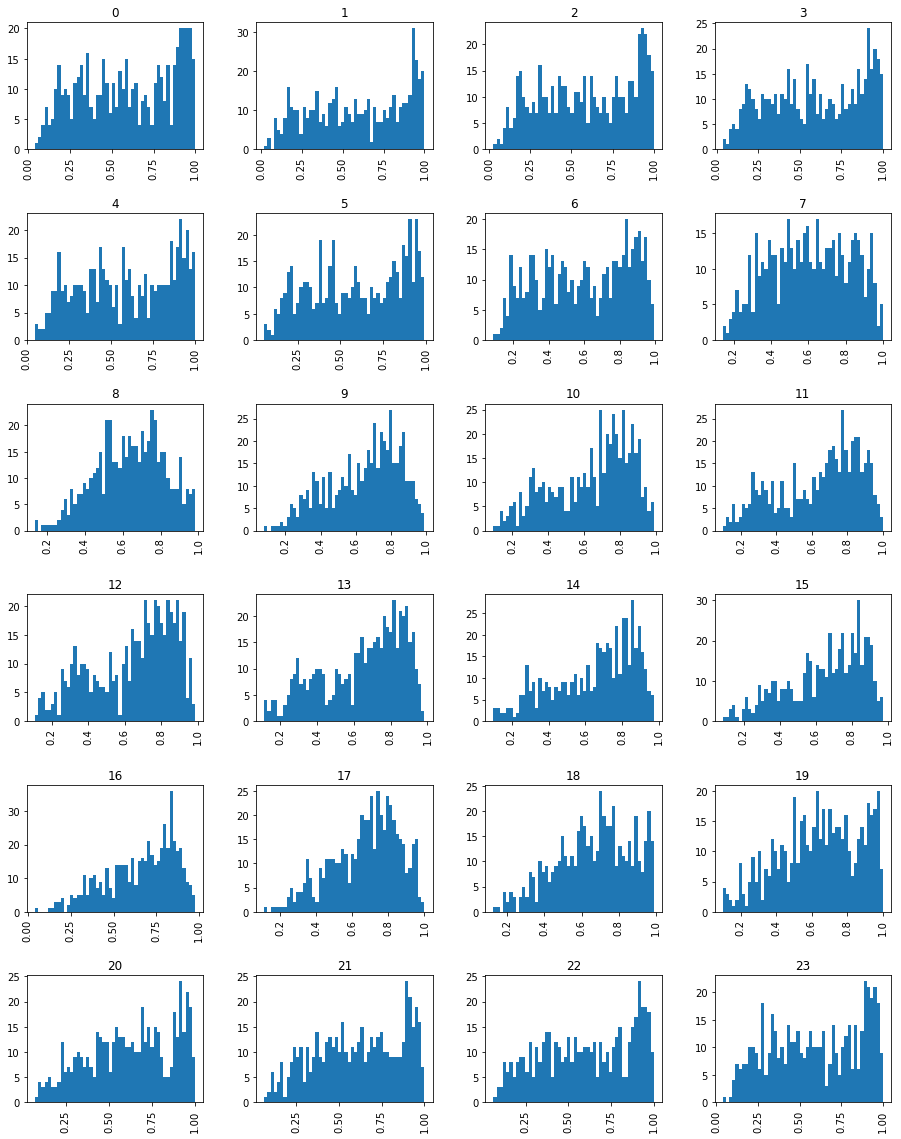

In [27]:
dock_avai_hour['dock_available_rate'].hist(by=dock_avai_hour['hour'], bins = 50, figsize=(15, 20), layout=(6,4))

In [28]:
list(dock)

['dock_id',
 'dock_name',
 'date',
 'hour',
 'minute',
 'avail_bikes',
 'avail_docks',
 'tot_docks',
 '_lat',
 '_long',
 'in_service',
 'status_key',
 'time',
 'dock_available_rate',
 'bike_available_rate',
 'year',
 'quarter',
 'month',
 'day',
 'week',
 'dayofweek',
 'weekday_name']

In [31]:
dock_clean = dock.groupby(['dock_id','dock_name','date','hour',
                             'tot_docks', '_lat', '_long', 
                            'year', 'quarter', 'month', 'day', 'week', 'dayofweek', 
                               'weekday_name'])\
                ['dock_available_rate'].mean().reset_index()
dock_clean

,dock_id,dock_name,date,hour,tot_docks,_lat,_long,year,quarter,month,day,week,dayofweek,weekday_name,dock_available_rate
0,72,W 52 St & 11 Ave,16-06-01,19,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.710526
1,72,W 52 St & 11 Ave,16-06-01,20,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.587719
2,72,W 52 St & 11 Ave,16-06-01,21,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.500000
3,72,W 52 St & 11 Ave,16-06-01,22,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.467105
4,72,W 52 St & 11 Ave,16-06-01,23,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.473684
5,72,W 52 St & 11 Ave,16-06-02,0,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.467105
6,72,W 52 St & 11 Ave,16-06-02,1,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.473684
7,72,W 52 St & 11 Ave,16-06-02,2,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.453947
8,72,W 52 St & 11 Ave,16-06-02,3,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.440789
9,72,W 52 St & 11 Ave,16-06-02,4,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.473684


In [32]:
dock_clean.loc[dock_clean['dock_available_rate'] < 0.2, 'status'] = 'Less Dock'
dock_clean.loc[dock_clean['dock_available_rate'] > 0.8, 'status'] = 'Less Bike'
dock_clean.loc[(dock_clean['dock_available_rate'] >= 0.2) &  (dock_clean['dock_available_rate'] <= 0.8), 'status'] = 'Balanced'
dock_clean

,dock_id,dock_name,date,hour,tot_docks,_lat,_long,year,quarter,month,day,week,dayofweek,weekday_name,dock_available_rate,status
0,72,W 52 St & 11 Ave,16-06-01,19,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.710526,Balanced
1,72,W 52 St & 11 Ave,16-06-01,20,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.587719,Balanced
2,72,W 52 St & 11 Ave,16-06-01,21,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.500000,Balanced
3,72,W 52 St & 11 Ave,16-06-01,22,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.467105,Balanced
4,72,W 52 St & 11 Ave,16-06-01,23,39,40.767272,-73.993929,2016,2,6,1,22,2,Wednesday,0.473684,Balanced
5,72,W 52 St & 11 Ave,16-06-02,0,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.467105,Balanced
6,72,W 52 St & 11 Ave,16-06-02,1,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.473684,Balanced
7,72,W 52 St & 11 Ave,16-06-02,2,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.453947,Balanced
8,72,W 52 St & 11 Ave,16-06-02,3,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.440789,Balanced
9,72,W 52 St & 11 Ave,16-06-02,4,39,40.767272,-73.993929,2016,2,6,2,22,3,Thursday,0.473684,Balanced


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1333b1e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x169062438>], dtype=object)

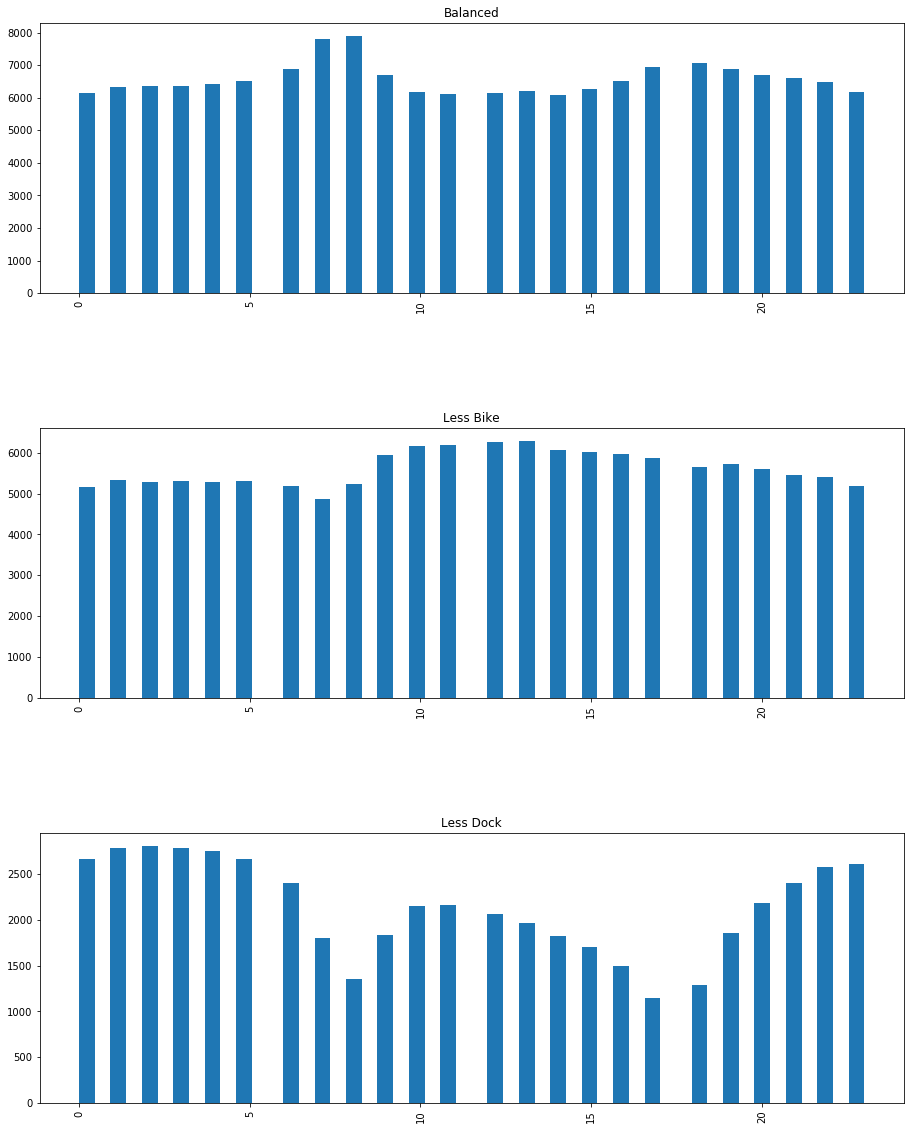

In [34]:
dock_clean['hour'].hist(by=dock_clean['status'], bins = 50, figsize=(15, 20), layout=(3,1))

In [37]:
dock_clean.groupby(['dock_id','dock_name', '_lat', '_long','weekday_name'])['status']

16